# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has aims to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

In [3]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [4]:
# Import and Inspect Datasets
df_observations = pd.read_csv("observations.csv")
df_species_info = pd.read_csv("species_info.csv")

# Merge on df_observations
df_merged = pd.merge(df_observations, df_species_info, how="left", on="scientific_name")
df_merged


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN
...,...,...,...,...,...,...
25627,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,NaN
25628,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,NaN
25629,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,NaN
25630,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,NaN


In [5]:
# Transform data
df_merged[['genus', 'species']] = df_merged['scientific_name'].str.split(' ', n=1, expand=True)
df_merged

,scientific_name,park_name,observations,category,common_names,conservation_status,genus,species
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,Vicia,benghalensis
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN,Neovison,vison
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN,Prunus,subcordata
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN,Abutilon,theophrasti
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN,Githopsis,specularioides
...,...,...,...,...,...,...,...,...
25627,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,NaN,Croton,monanthogynus
25628,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,NaN,Otospermophilus,beecheyi
25629,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,NaN,Heterotheca,sessiliflora ssp. echioides
25630,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,NaN,Dicranella,rufescens


In [6]:
# Rearrange columns 
df_clean = df_merged[['category', 'scientific_name', 'common_names', 'genus', 'species', 'observations', 'conservation_status', 'park_name']]
df_clean

,category,scientific_name,common_names,genus,species,observations,conservation_status,park_name
0,Vascular Plant,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Vicia,benghalensis,68,NaN,Great Smoky Mountains National Park
1,Mammal,Neovison vison,American Mink,Neovison,vison,77,NaN,Great Smoky Mountains National Park
2,Vascular Plant,Prunus subcordata,Klamath Plum,Prunus,subcordata,138,NaN,Yosemite National Park
3,Vascular Plant,Abutilon theophrasti,Velvetleaf,Abutilon,theophrasti,84,NaN,Bryce National Park
4,Vascular Plant,Githopsis specularioides,Common Bluecup,Githopsis,specularioides,85,NaN,Great Smoky Mountains National Park
...,...,...,...,...,...,...,...,...
25627,Vascular Plant,Croton monanthogynus,Prairie Tea,Croton,monanthogynus,173,NaN,Yosemite National Park
25628,Mammal,Otospermophilus beecheyi,California Ground Squirrel,Otospermophilus,beecheyi,130,NaN,Bryce National Park
25629,Vascular Plant,Heterotheca sessiliflora ssp. echioides,Sessileflower False Goldenaster,Heterotheca,sessiliflora ssp. echioides,140,NaN,Bryce National Park
25630,Nonvascular Plant,Dicranella rufescens,Dicranella Moss,Dicranella,rufescens,171,NaN,Yosemite National Park


In [7]:
# Inspection
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   genus                25632 non-null  object
 4   species              25532 non-null  object
 5   observations         25632 non-null  int64 
 6   conservation_status  880 non-null    object
 7   park_name            25632 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [8]:
# Inspect conservation_status column
df_clean['conservation_status'].value_counts()

# Replace null values with "least concern"
df_clean['conservation_status'].fillna("Least Concern", inplace=True)

# Preview
df_clean.head()

,category,scientific_name,common_names,genus,species,observations,conservation_status,park_name
0,Vascular Plant,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Vicia,benghalensis,68,Least Concern,Great Smoky Mountains National Park
1,Mammal,Neovison vison,American Mink,Neovison,vison,77,Least Concern,Great Smoky Mountains National Park
2,Vascular Plant,Prunus subcordata,Klamath Plum,Prunus,subcordata,138,Least Concern,Yosemite National Park
3,Vascular Plant,Abutilon theophrasti,Velvetleaf,Abutilon,theophrasti,84,Least Concern,Bryce National Park
4,Vascular Plant,Githopsis specularioides,Common Bluecup,Githopsis,specularioides,85,Least Concern,Great Smoky Mountains National Park


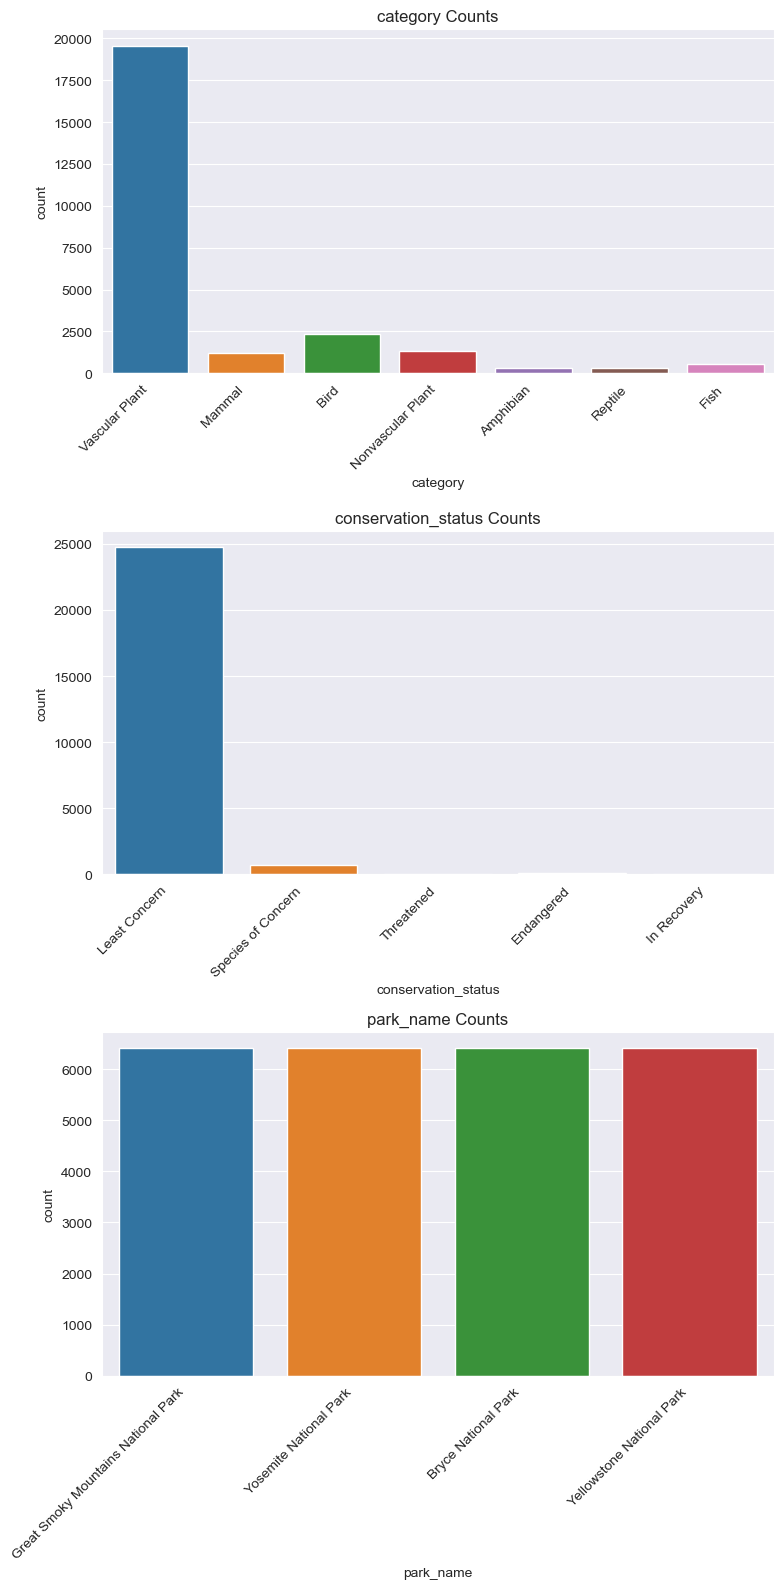

In [9]:
# Univariate analysis
fig0, ax0 = plt.subplots(3,1, figsize=(8,16))
sns.countplot(data=df_clean, x='category', ax=ax0[0])
sns.countplot(data=df_clean, x='conservation_status', ax=ax0[1])
sns.countplot(data=df_clean, x='park_name', ax=ax0[2])
ax0[0].set_xticklabels(labels=ax0[0].get_xticklabels(), rotation=45, ha='right')
ax0[0].set_title("category Counts")
ax0[1].set_xticklabels(labels=ax0[1].get_xticklabels(), rotation=45, ha='right')
ax0[1].set_title("conservation_status Counts")
ax0[2].set_xticklabels(labels=ax0[2].get_xticklabels(), rotation=45, ha='right')
ax0[2].set_title("park_name Counts")
plt.tight_layout()
plt.show()


## Univariate Analysis Results

Majority of observations made were of 'Vascular Plants' and 'Species of Least Concern'. 

Same amount of observations were made across four parks.



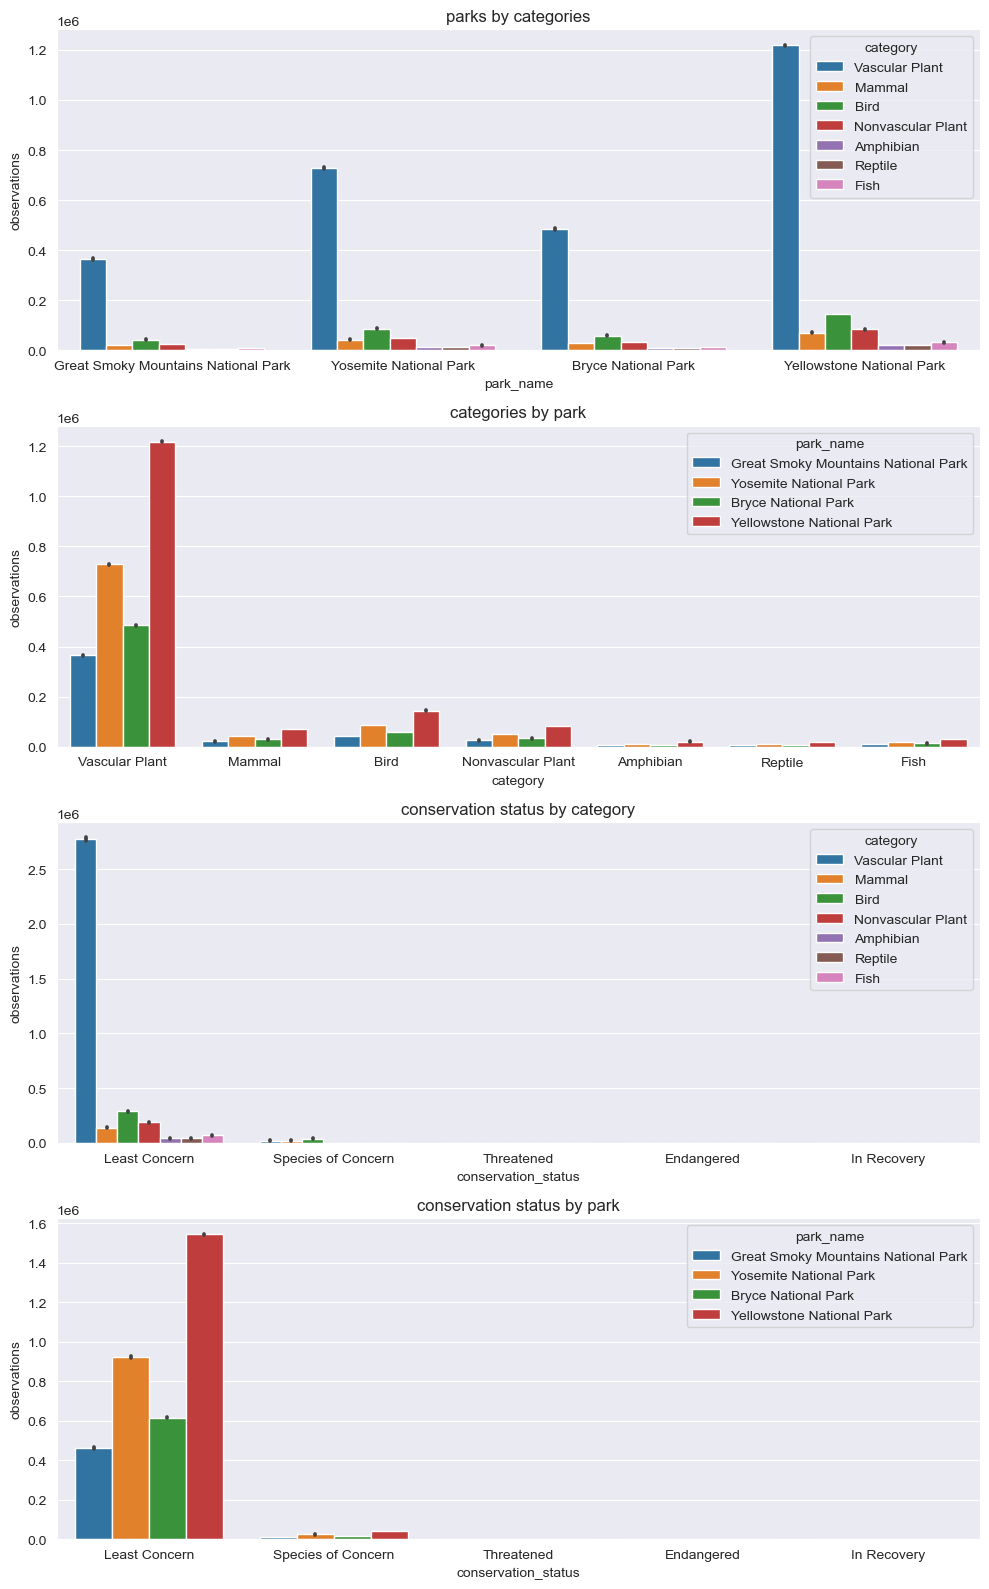

In [10]:
# Multivariate exploration
fig1, ax1 = plt.subplots(4,1, figsize=(10,16))
# Countplots by park
sns.barplot(data=df_clean, x='park_name', y='observations', hue='category', estimator=np.sum, ax=ax1[0])
sns.barplot(data=df_clean, x='category', y='observations', hue='park_name', estimator=np.sum, ax=ax1[1])
sns.barplot(data=df_clean, x='conservation_status', y='observations', hue='category', estimator=np.sum, ax=ax1[2])
sns.barplot(data=df_clean, x='conservation_status', y='observations', hue='park_name', estimator=np.sum, ax=ax1[3])

# Set Titles
ax1[0].set_title("parks by categories")
ax1[1].set_title("categories by park")
ax1[2].set_title("conservation status by category")
ax1[3].set_title("conservation status by park")
plt.tight_layout()
plt.show()

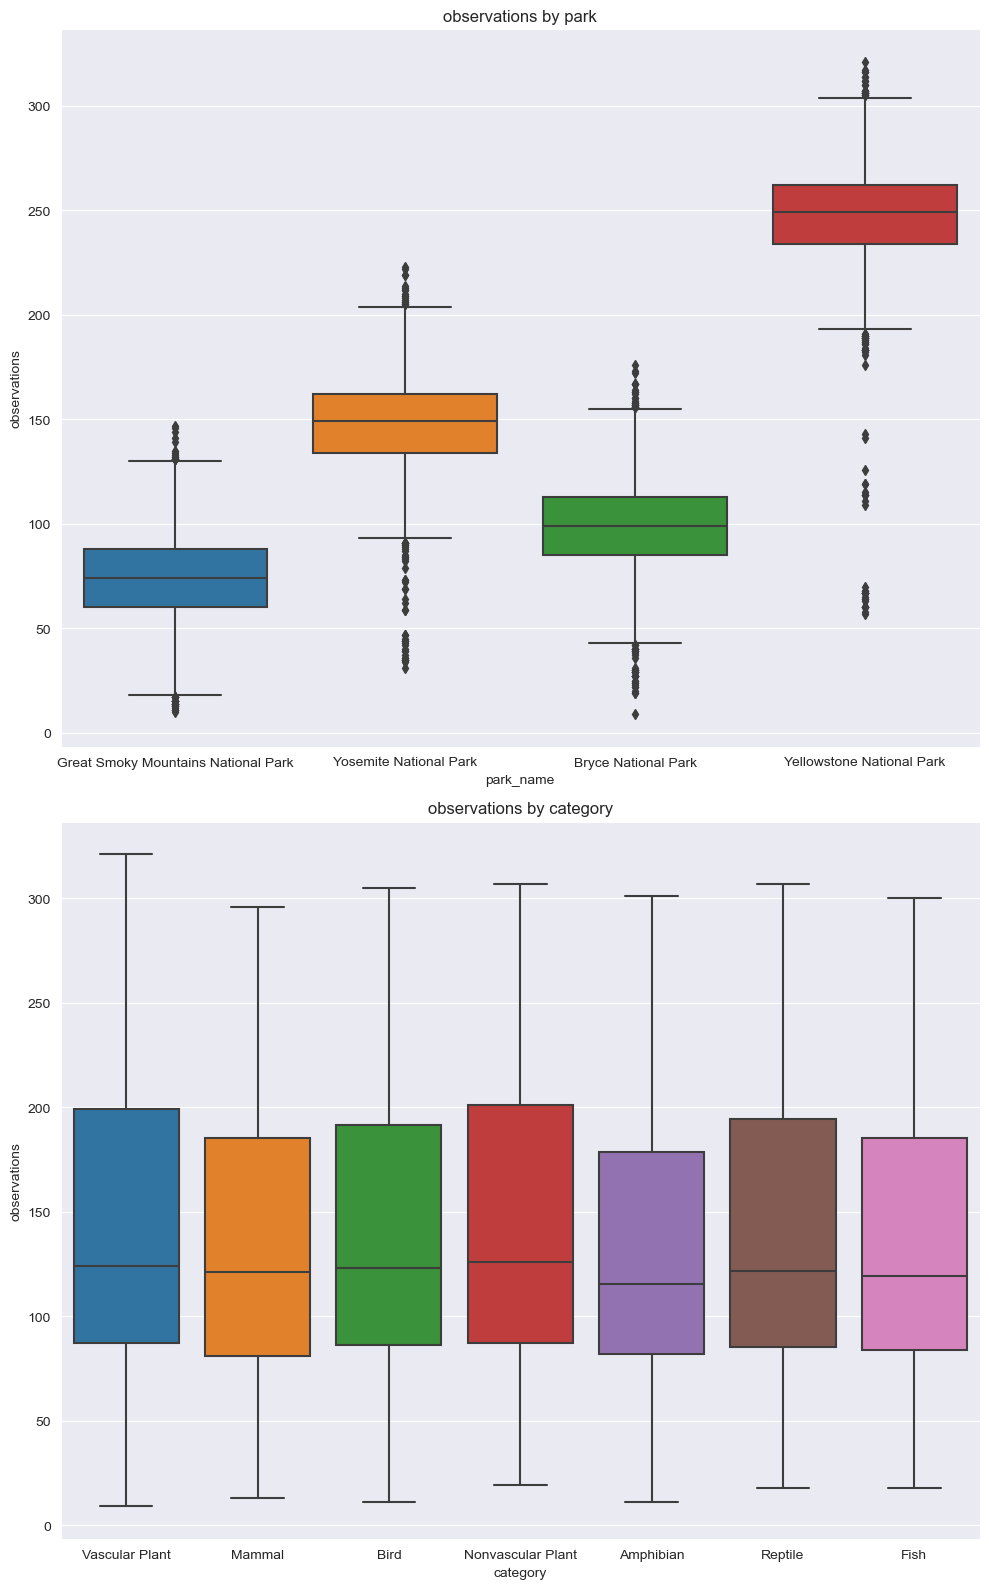

In [11]:
# Boxplots 
fig2, ax2 = plt.subplots(2,1, figsize=(10,16))
# Countplots by park
sns.boxplot(data=df_clean, x='park_name', y='observations', ax=ax2[0])
sns.boxplot(data=df_clean, x='category', y='observations', ax=ax2[1])

# Set Titles
ax2[0].set_title("observations by park")
ax2[1].set_title("observations by category")
plt.tight_layout()
plt.show()

In [12]:
# Define function to autoplot
def gen_bars(df, by=None):
    if by == 'conservation_status':
        fig, ax = plt.subplots(1, 1, figsize=(12,8))
        sns.countplot(data=df, x='park_name', hue='category', ax=ax)
        return fig
    elif by == 'category':
        fig, ax = plt.subplots(2, 1, figsize=(12,8))
        sns.countplot(data=df, x='conservation_status', hue='park_name', ax=ax[0])
        sns.countplot(data=df, x='park_name', hue='conservation_status', ax=ax[1])
        return fig
    elif by == 'park_name':
        fig, ax = plt.subplots(2, 1, figsize=(12,8))
        sns.countplot(data=df, x='conservation_status', hue='category', ax=ax[0])
        sns.countplot(data=df, x='category', hue='conservation_status', ax=ax[1])
        return fig
    else:
            print("Pass \'conservation_status\', \'category\' or \'park_name\' into the by argument")

# Plot by category

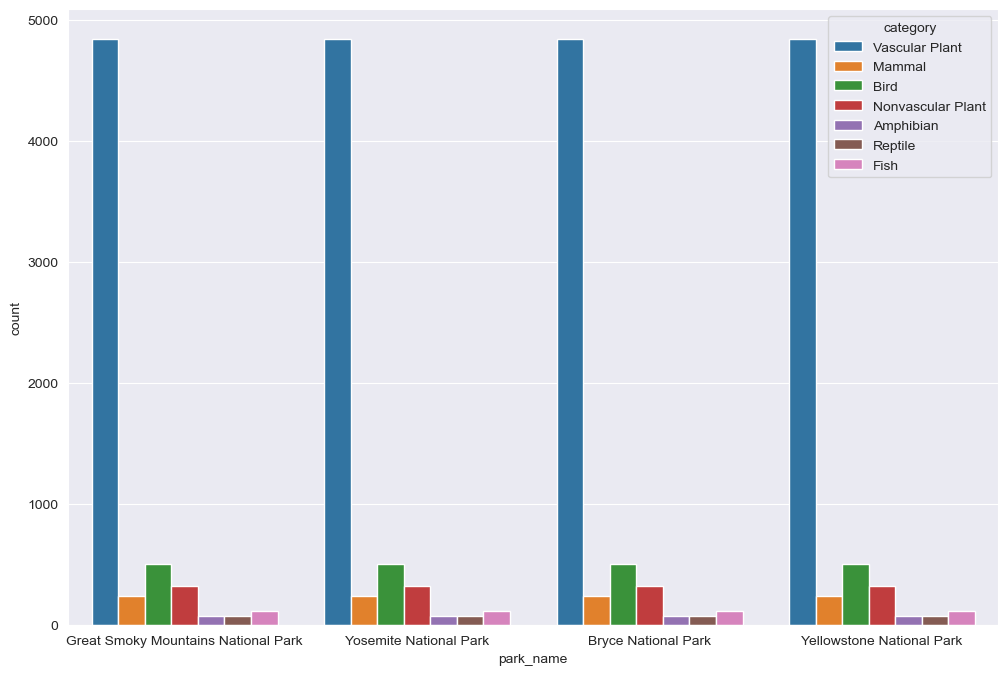

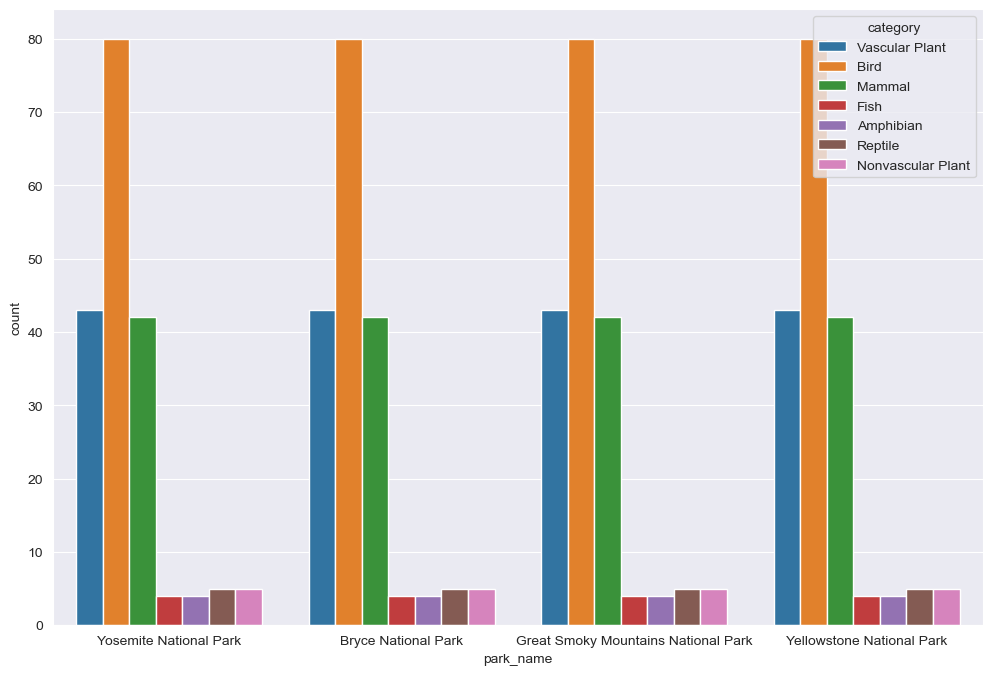

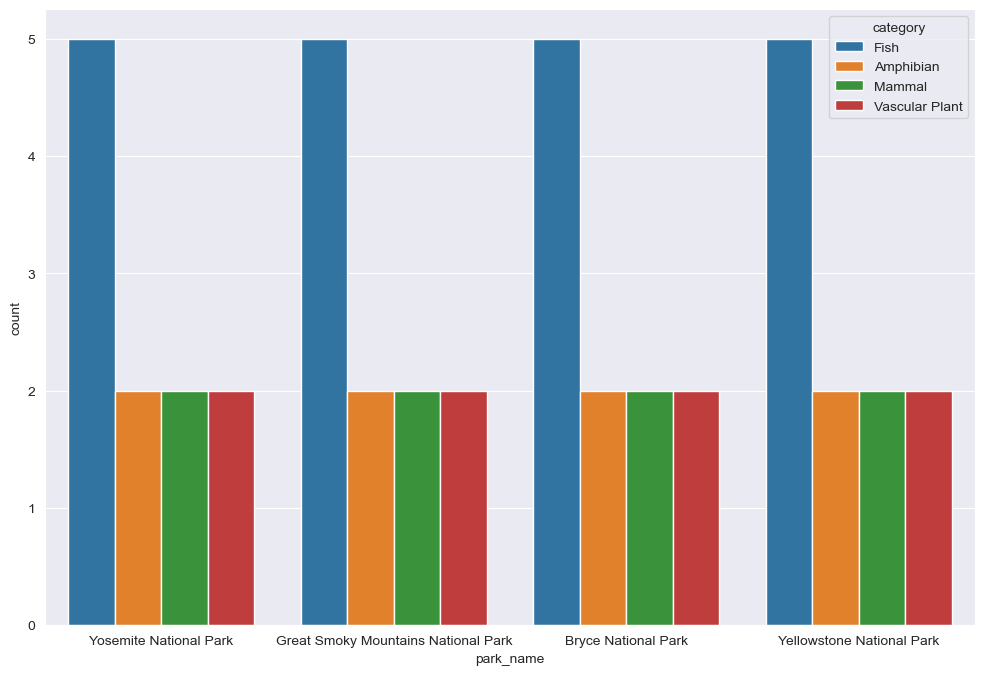

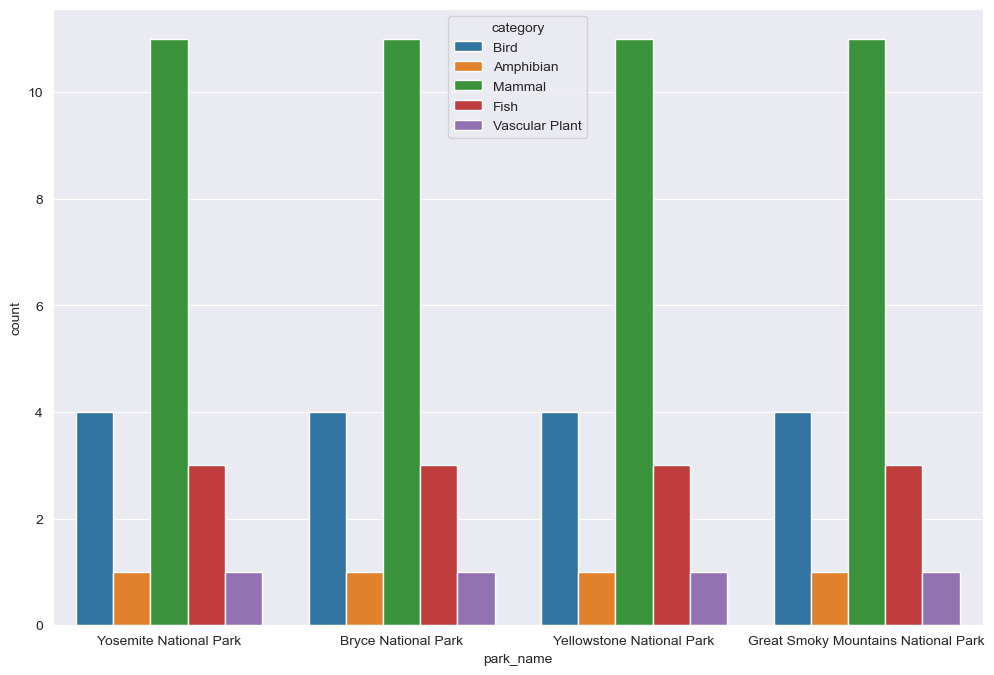

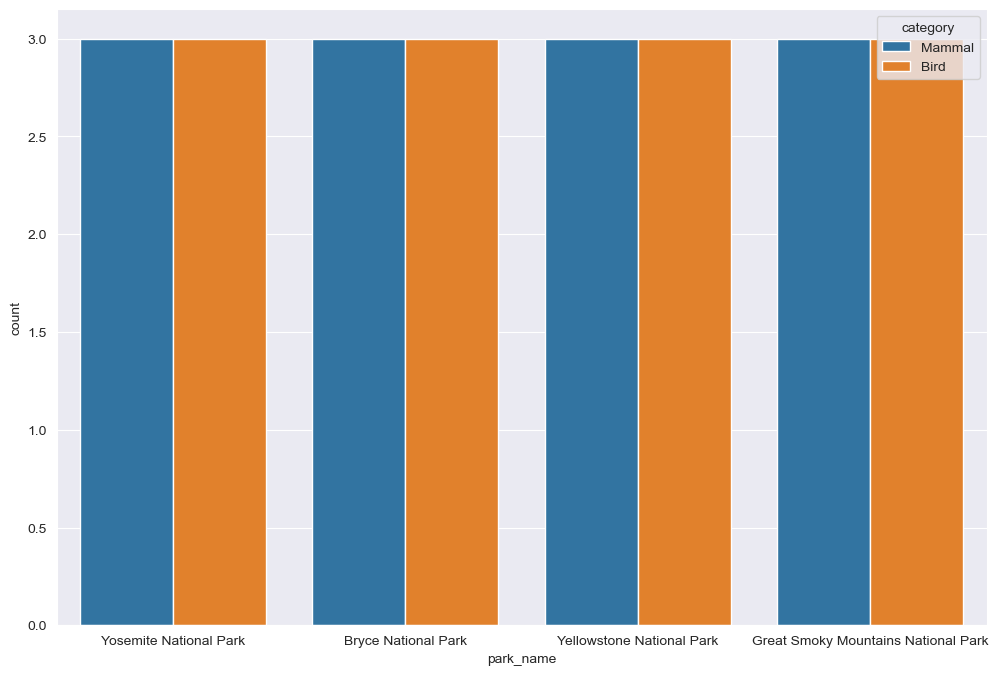

,category,scientific_name,common_names,genus,species,observations,conservation_status,park_name
0,Vascular Plant,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Vicia,benghalensis,68,Least Concern,Great Smoky Mountains National Park
1,Mammal,Neovison vison,American Mink,Neovison,vison,77,Least Concern,Great Smoky Mountains National Park
2,Vascular Plant,Prunus subcordata,Klamath Plum,Prunus,subcordata,138,Least Concern,Yosemite National Park
3,Vascular Plant,Abutilon theophrasti,Velvetleaf,Abutilon,theophrasti,84,Least Concern,Bryce National Park
4,Vascular Plant,Githopsis specularioides,Common Bluecup,Githopsis,specularioides,85,Least Concern,Great Smoky Mountains National Park
...,...,...,...,...,...,...,...,...
25627,Vascular Plant,Croton monanthogynus,Prairie Tea,Croton,monanthogynus,173,Least Concern,Yosemite National Park
25628,Mammal,Otospermophilus beecheyi,California Ground Squirrel,Otospermophilus,beecheyi,130,Least Concern,Bryce National Park
25629,Vascular Plant,Heterotheca sessiliflora ssp. echioides,Sessileflower False Goldenaster,Heterotheca,sessiliflora ssp. echioides,140,Least Concern,Bryce National Park
25630,Nonvascular Plant,Dicranella rufescens,Dicranella Moss,Dicranella,rufescens,171,Least Concern,Yosemite National Park


In [13]:
# Split, apply, combine
# By Conservation
df_cons_leastconcerned = df_clean[df_clean['conservation_status'] == "Least Concern"]
df_cons_concerned = df_clean[df_clean['conservation_status'] == "Species of Concern"]
df_cons_threatened = df_clean[df_clean['conservation_status'] == "Threatened"]
df_cons_endangered = df_clean[df_clean['conservation_status'] == "Endangered"]
df_cons_inrecovery = df_clean[df_clean['conservation_status'] == "In Recovery"]

list_df_cons = [df_cons_leastconcerned, df_cons_concerned, df_cons_threatened, df_cons_endangered, df_cons_inrecovery]

# Explore conservation statuses
for df in list_df_cons:
    fig3 = gen_bars(df, by="conservation_status")
    plt.show()

df_cons_leastconcerned

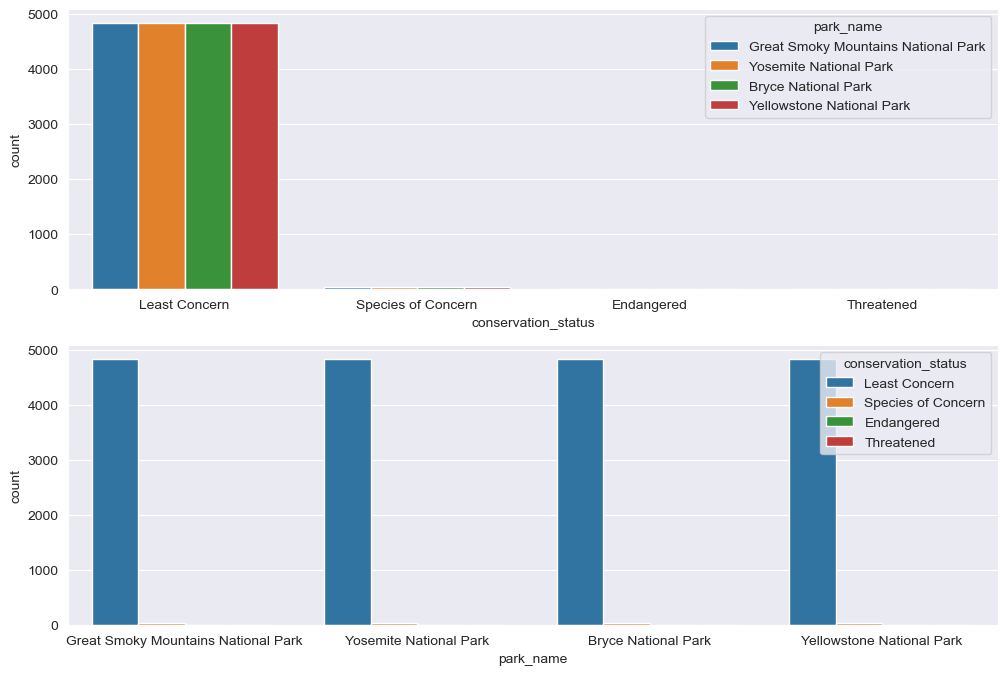

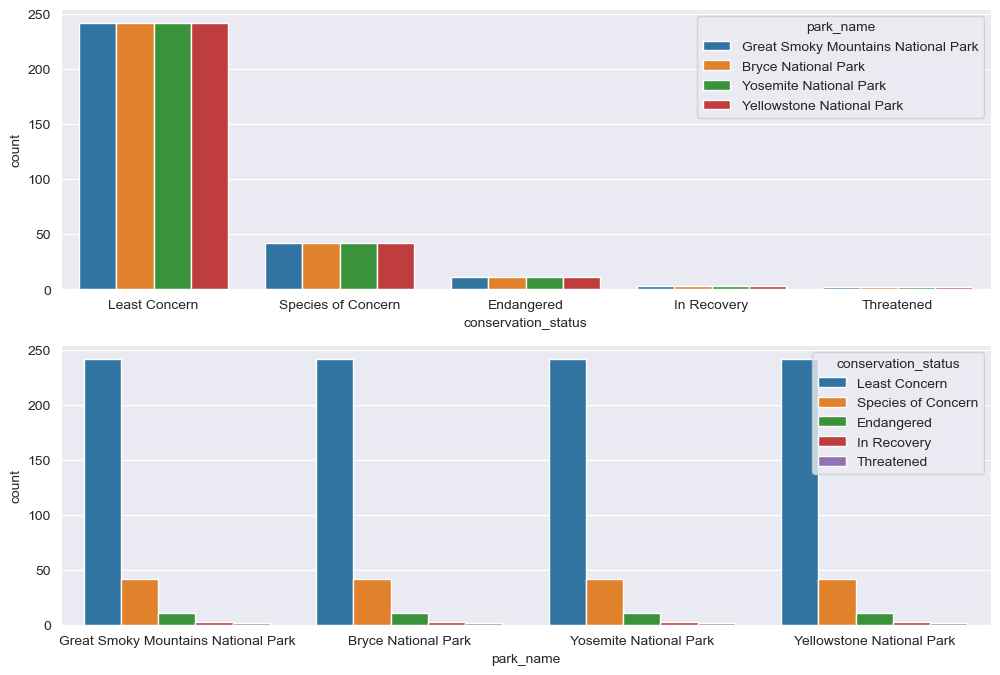

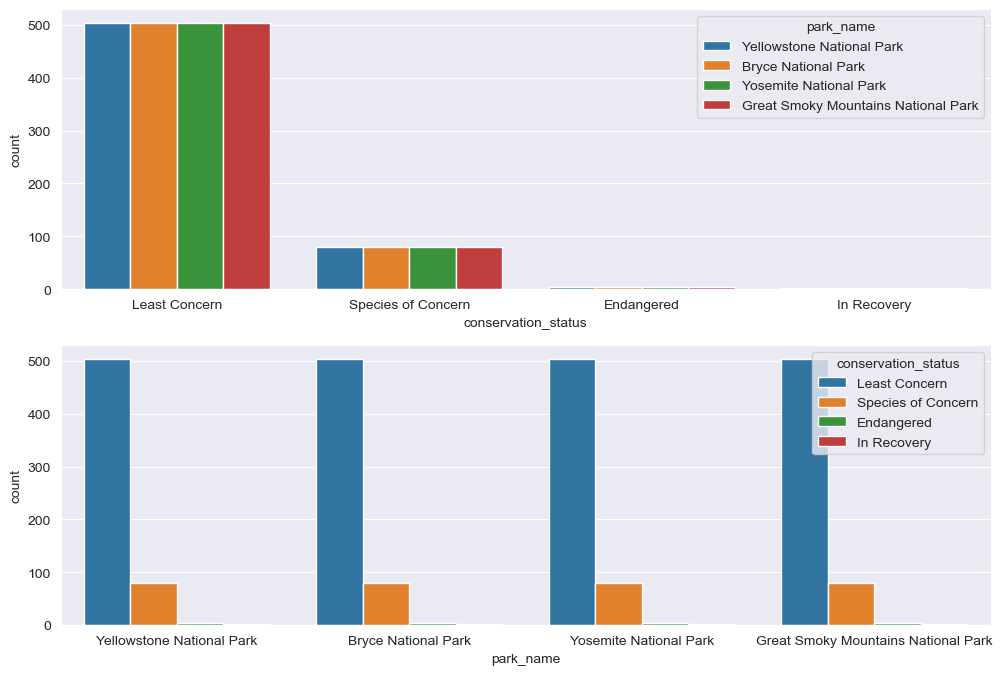

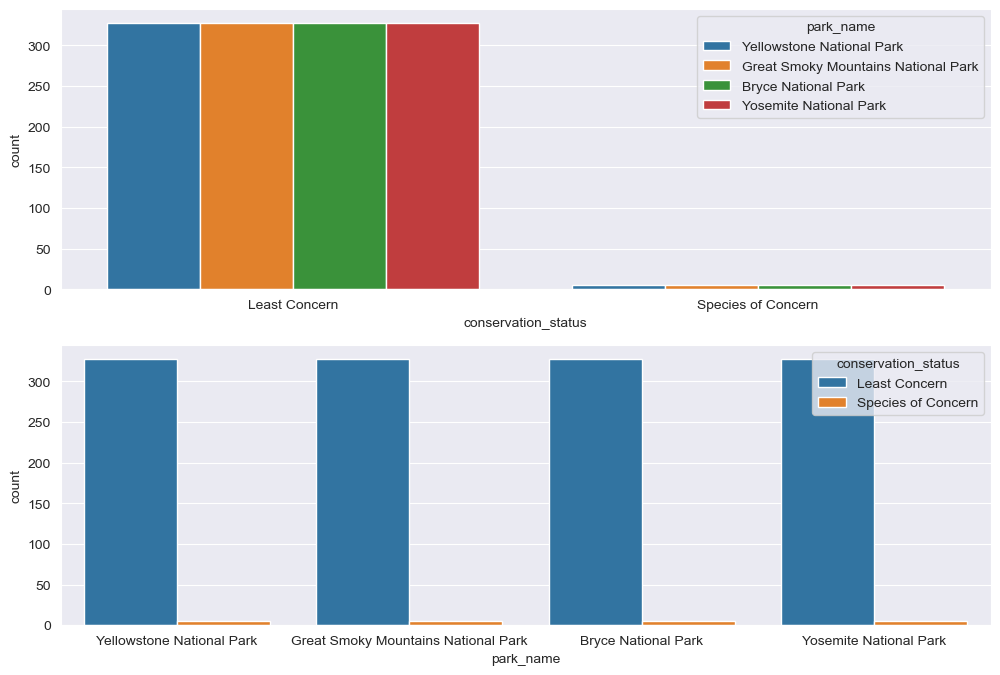

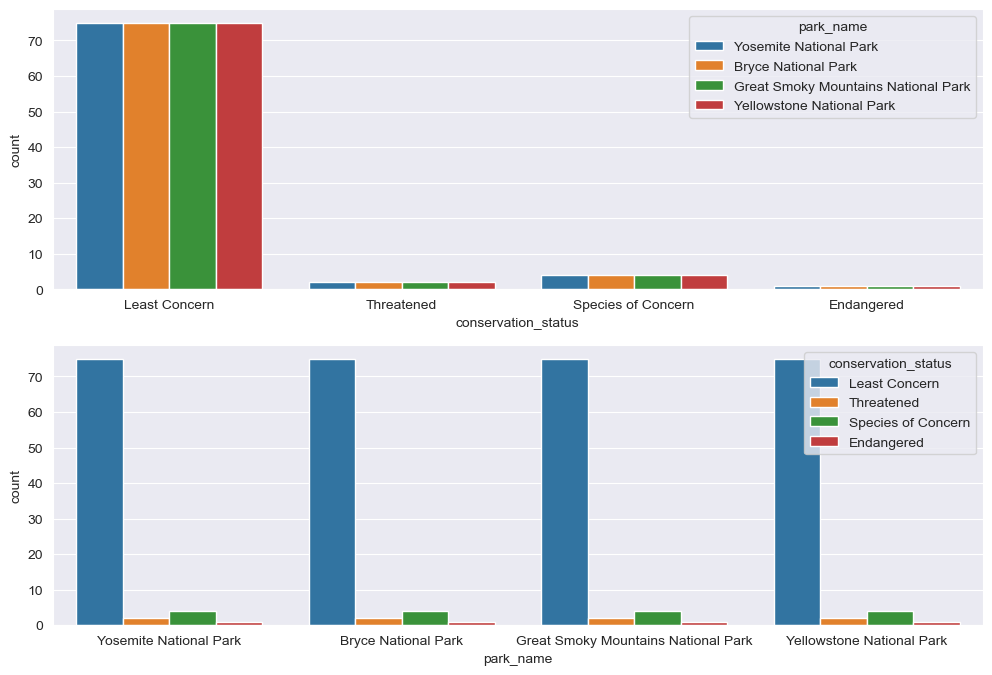

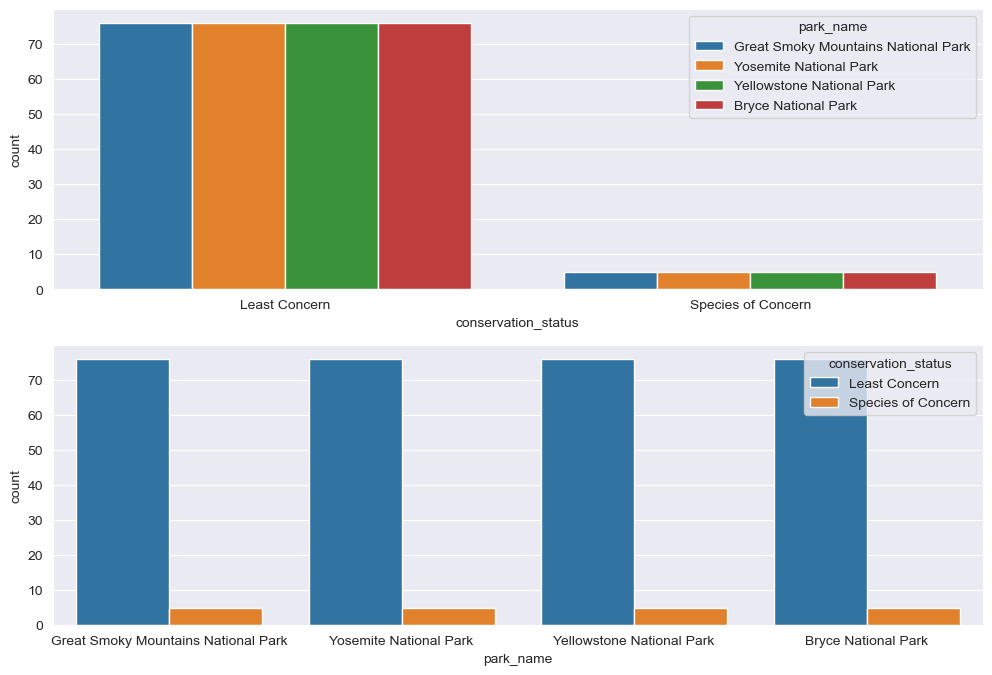

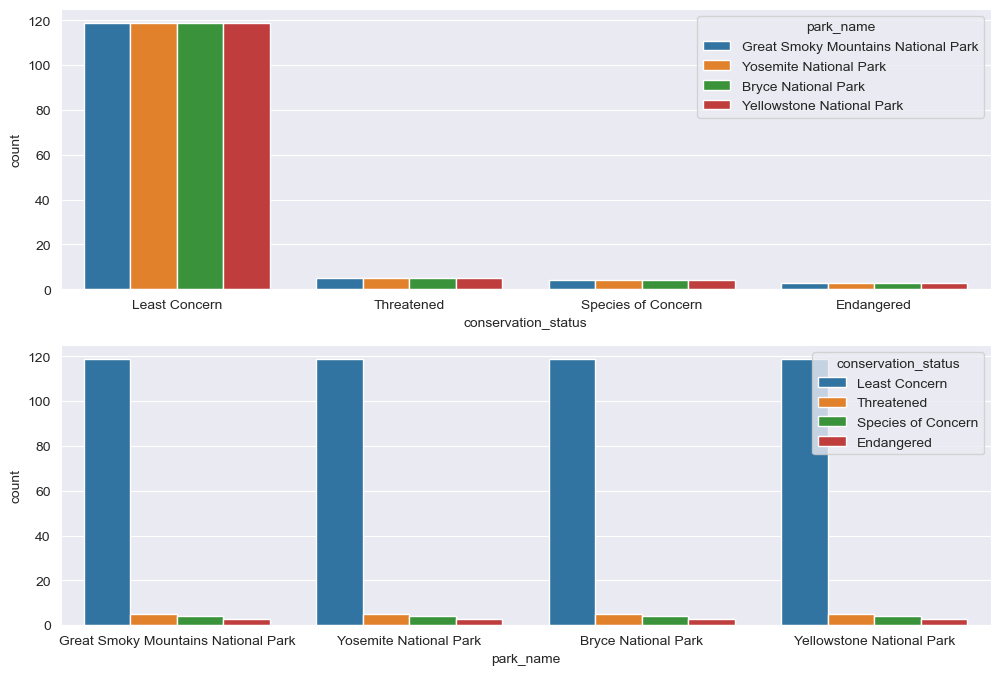

In [14]:
# Split, apply, combine
# By Category
df_cat_vascplant = df_clean[df_clean['category'] == "Vascular Plant"]
df_cat_mammal = df_clean[df_clean['category'] == "Mammal"]
df_cat_bird = df_clean[df_clean['category'] == "Bird"]
df_cat_nonvascplant = df_clean[df_clean['category'] == "Nonvascular Plant"]
df_cat_amphibian = df_clean[df_clean['category'] == "Amphibian"]
df_cat_reptile = df_clean[df_clean['category'] == "Reptile"]
df_cat_fish = df_clean[df_clean['category'] == "Fish"]

list_df_cats = [df_cat_vascplant, df_cat_mammal, df_cat_bird, df_cat_nonvascplant, df_cat_amphibian, df_cat_reptile, df_cat_fish]

# Explore animal categories
for df in list_df_cats:
    fig4 = gen_bars(df, by="category")
    plt.show()


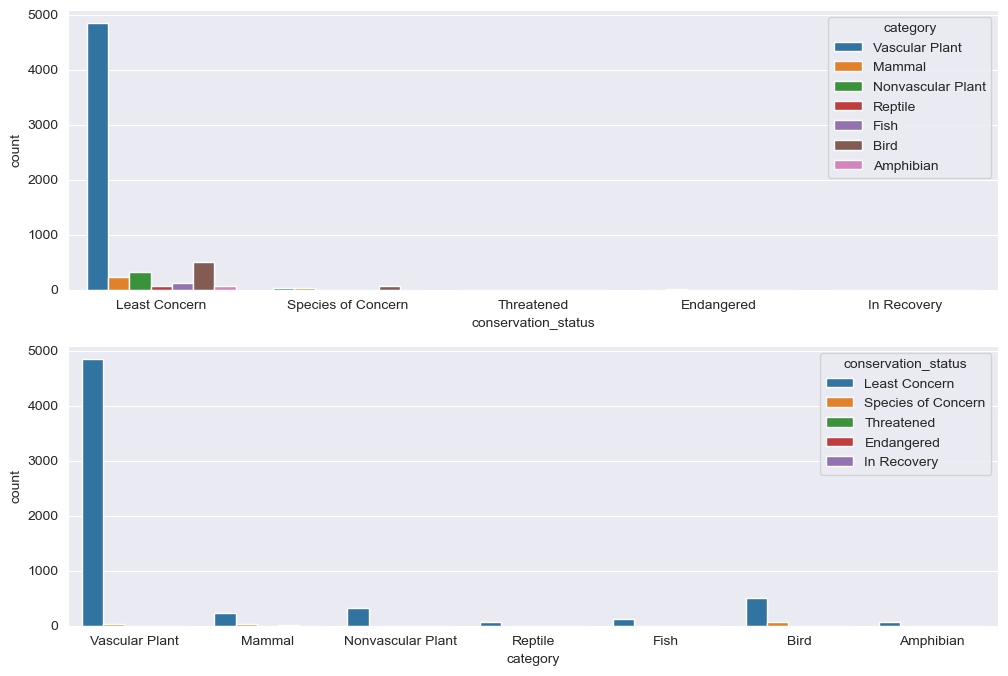

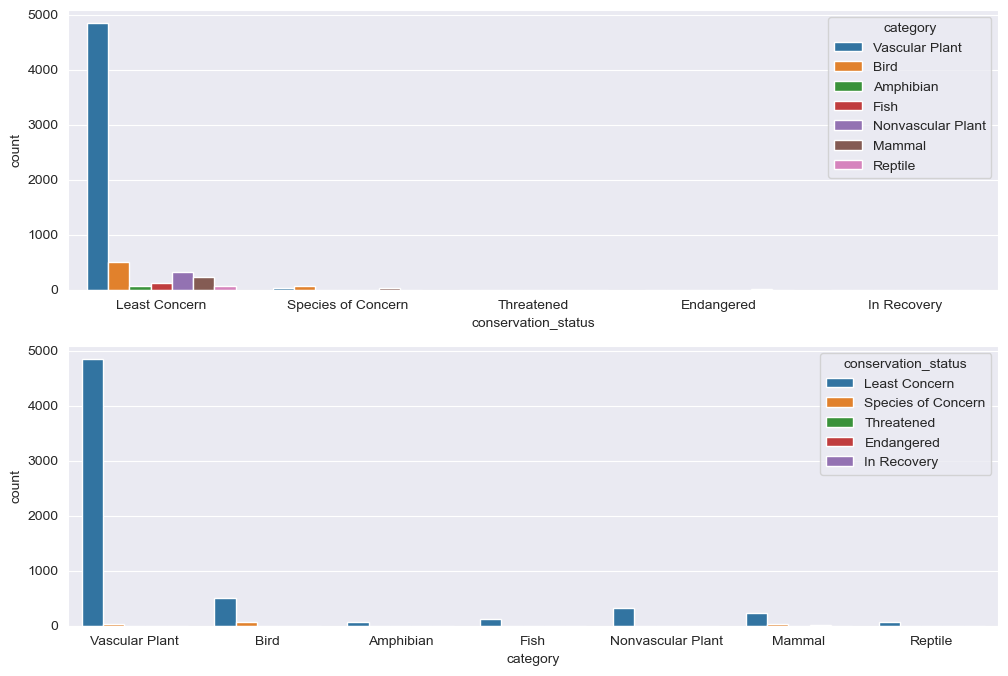

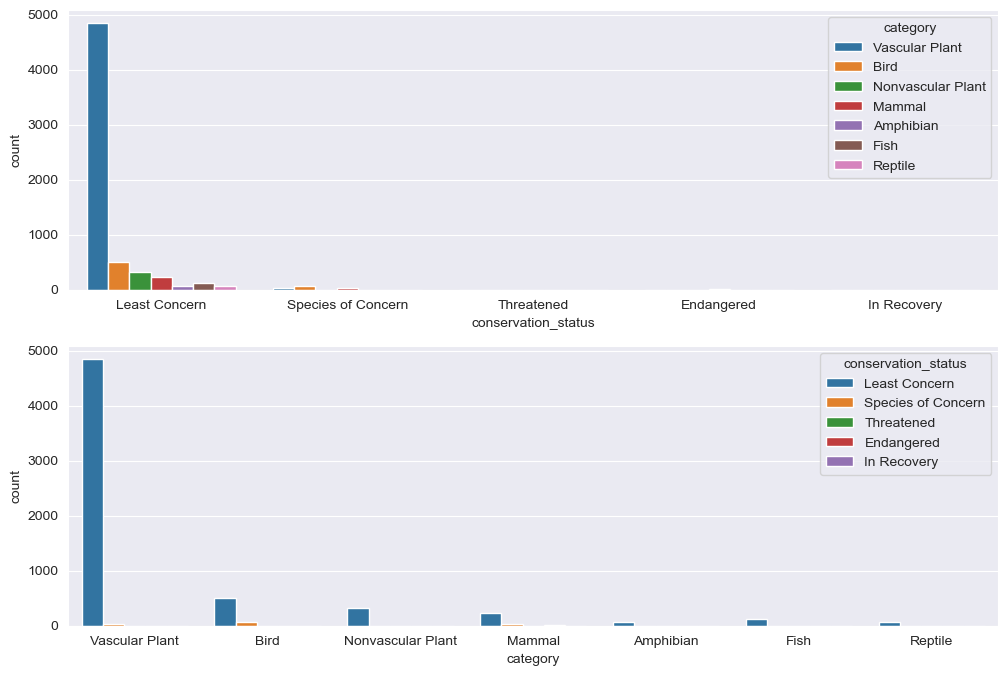

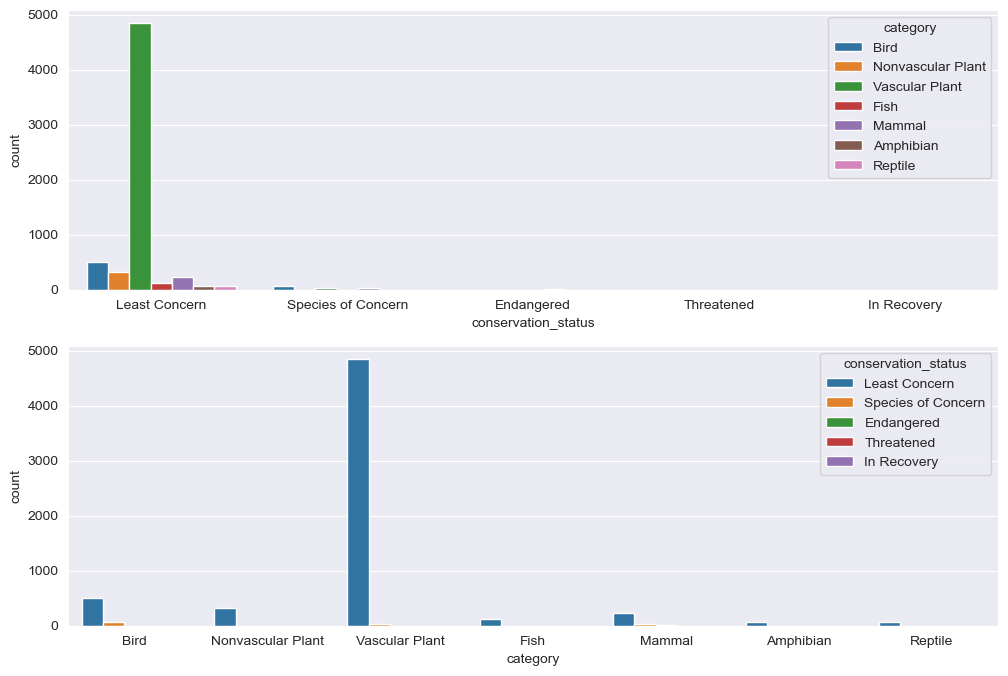

In [15]:
# Split, apply, combine
# By Park
df_park_grtsmkymtns = df_clean[df_clean['park_name'] =="Great Smoky Mountains National Park"]
df_park_yosemite = df_clean[df_clean['park_name'] =="Yosemite National Park"]
df_park_bryce = df_clean[df_clean['park_name'] == "Bryce National Park"]
df_park_yellowstn = df_clean[df_clean['park_name'] == "Yellowstone National Park"]

list_df_parks = [df_park_grtsmkymtns, df_park_yosemite, df_park_bryce, df_park_yellowstn]

# Explore parks
for df in list_df_parks:
    fig4 = gen_bars(df, by="park_name")
    plt.show()

In [16]:
# Aggregation
df_agg_genus = df_clean.groupby(['category', 'genus', 'conservation_status', 'park_name']).agg({'observations': 'sum'}).reset_index()
df_agg_genus.head()

# Least concern comprise most of the data. 
# Subsetting will allow us to explore the data in higher resolution.
# Subset data without 'least concern'
df_agg_genus_filtered = df_agg_genus[~(df_agg_genus['conservation_status'] == 'Least Concern')]

# Preview data
df_agg_genus_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 12 to 6823
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             644 non-null    object
 1   genus                644 non-null    object
 2   conservation_status  644 non-null    object
 3   park_name            644 non-null    object
 4   observations         644 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 30.2+ KB


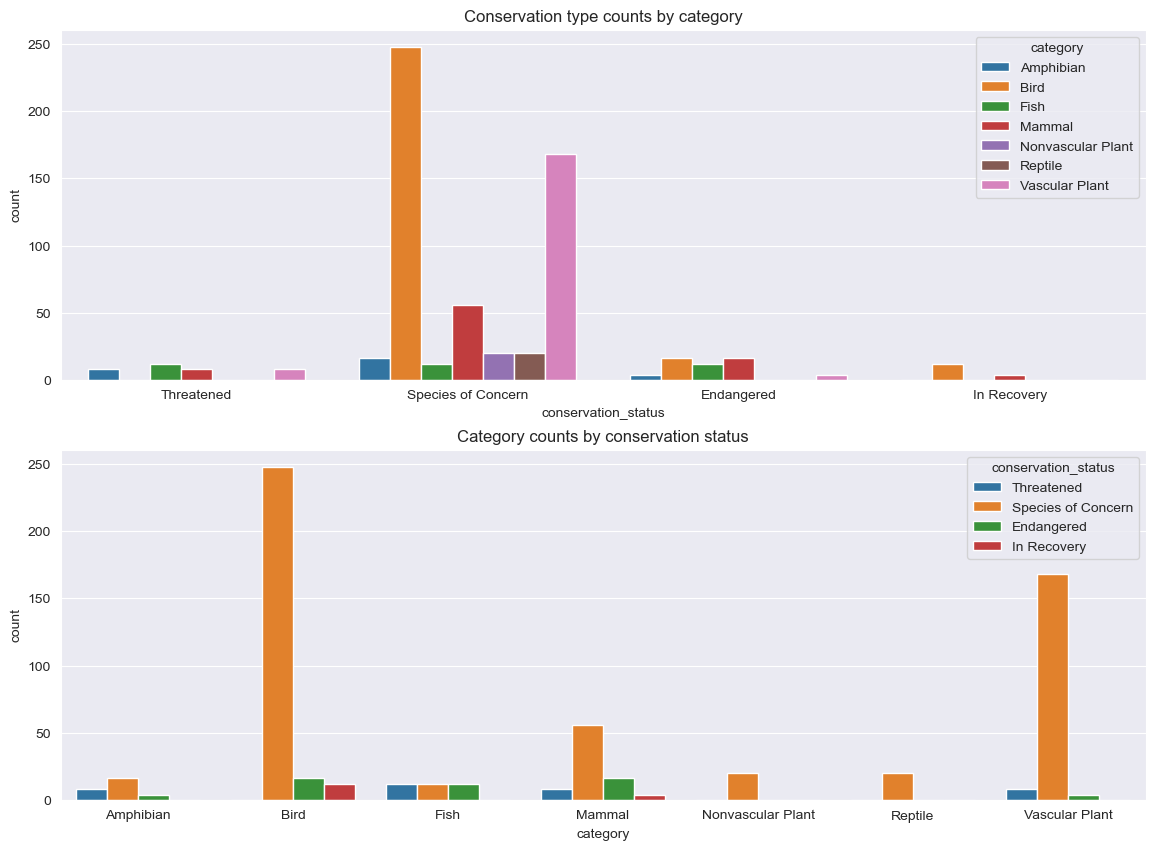

In [17]:
# Plot 
fig5, ax5 = plt.subplots(2,1, figsize=(14,10))
sns.countplot(data=df_agg_genus_filtered, x='conservation_status', hue='category', ax=ax5[0])
ax5[0].set_title('Conservation type counts by category')
sns.countplot(data=df_agg_genus_filtered, x='category', hue='conservation_status', ax=ax5[1])
ax5[1].set_title('Category counts by conservation status')
plt.show()

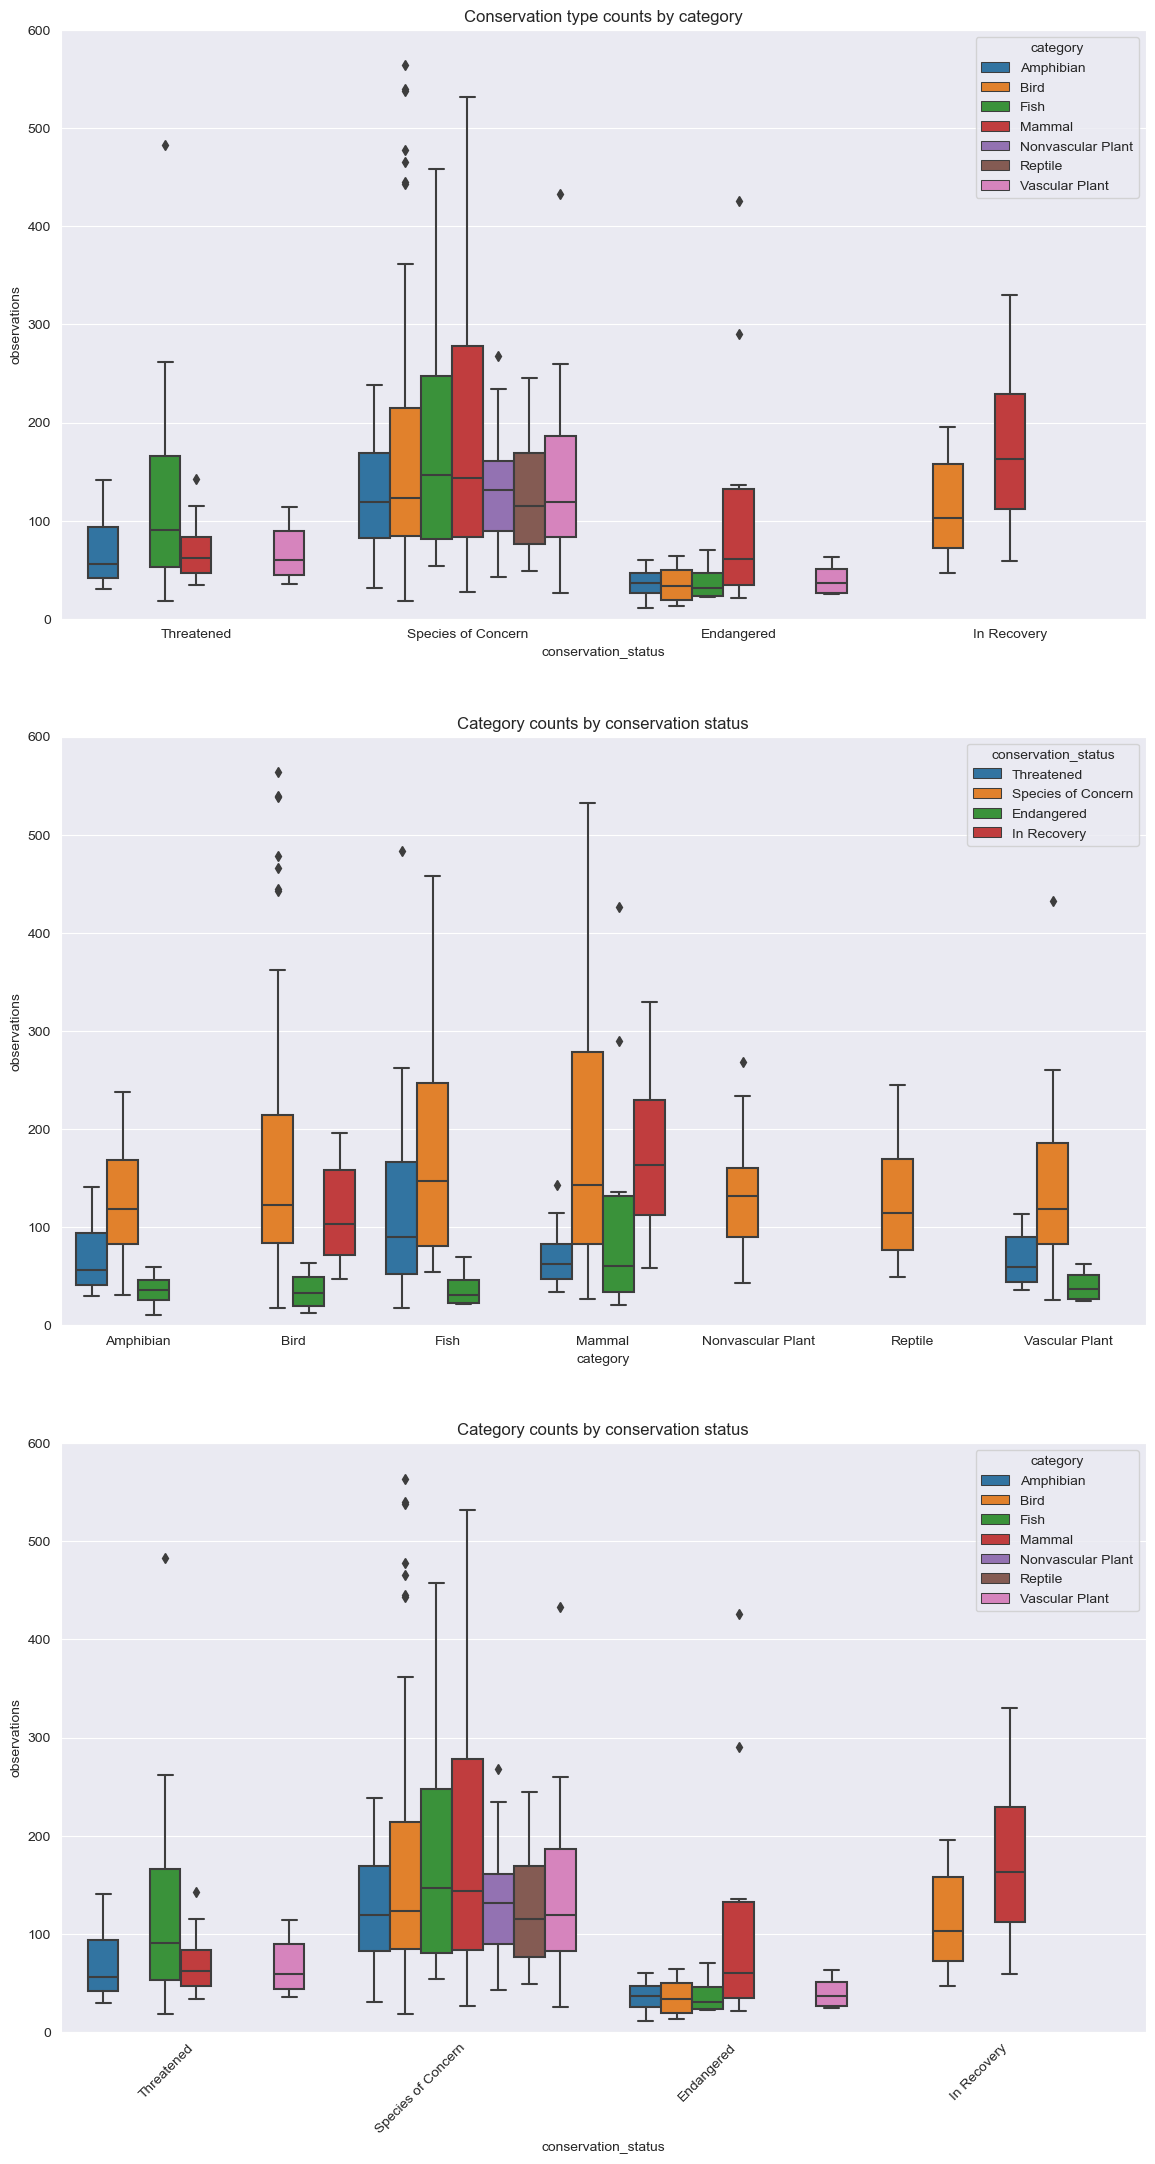

In [18]:
# Plot 
fig6, ax6 = plt.subplots(3,1, figsize=(14,26))
sns.boxplot(data=df_agg_genus_filtered, x='conservation_status', y='observations', hue='category', ax=ax6[0])
ax6[0].set_title('Conservation type counts by category')
ax6[0].set_ylim(0,600)
sns.boxplot(data=df_agg_genus_filtered, x='category', y='observations', hue='conservation_status', ax=ax6[1])
ax6[1].set_title('Category counts by conservation status')
ax6[1].set_ylim(0,600)
sns.boxplot(data=df_agg_genus_filtered, x='conservation_status', y='observations', hue='category', ax=ax6[2])
ax6[2].set_title('Category counts by conservation status')
ax6[2].set_xticklabels(labels= ax6[2].get_xticklabels(), rotation=45, ha='right')
ax6[2].set_ylim(0,600)
plt.show()

In [25]:
# Based on exploratory data analysis, 
# there might be a inconsistencies between observational counts and conservation status
df_agg_genus_means = df_agg_genus.groupby('conservation_status').agg({'observations': 'mean'}).reset_index()
print(df_agg_genus_means.sort_values(by='observations'))

  conservation_status  observations
0          Endangered     67.557692
4          Threatened     92.750000
1         In Recovery    131.687500
3  Species of Concern    174.003704
2       Least Concern    573.191909


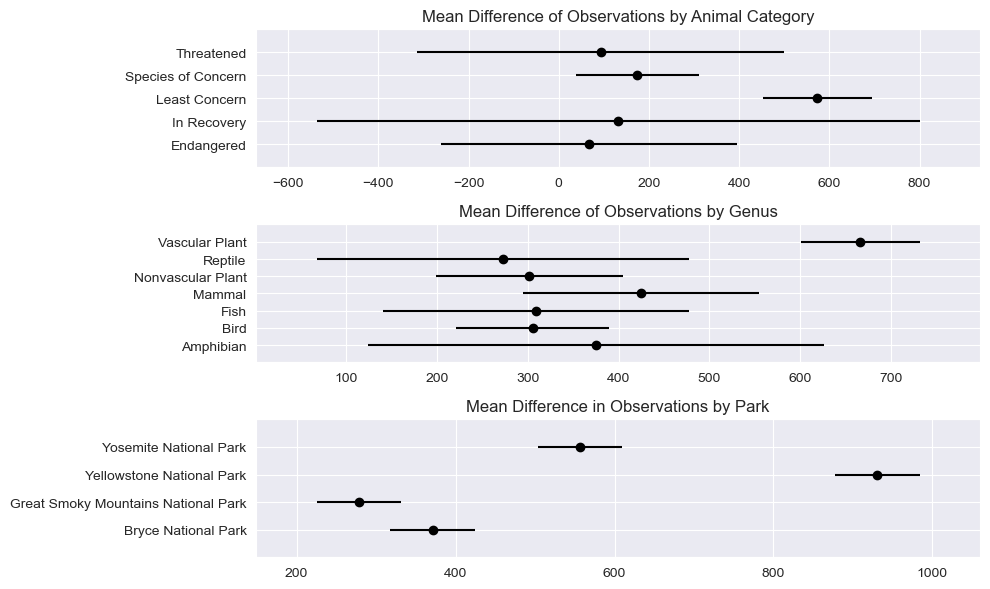

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform TukeyHSD
tukey_status = pairwise_tukeyhsd(df_agg_genus.observations, df_agg_genus.conservation_status, 0.05)
tukey_categories = pairwise_tukeyhsd(df_agg_genus.observations, df_agg_genus.category, 0.05)
tukey_parks = pairwise_tukeyhsd(df_agg_genus.observations, df_agg_genus.park_name, 0.05)


# Plot mean differences
fig7, ax7 = plt.subplots(3,1)
tukey_status.plot_simultaneous(comparison_name=None, ax=ax7[0])
tukey_categories.plot_simultaneous(comparison_name=None, ax=ax7[1])
tukey_parks.plot_simultaneous(comparison_name=None, ax=ax7[2])

# Set Labels
ax7[0].set_title('Mean Difference of Observations by Animal Category')
ax7[1].set_title('Mean Difference of Observations by Genus')
ax7[2].set_title('Mean Difference in Observations by Park')
fig7.tight_layout()
plt.show()


In [22]:
# View Results
print(tukey_status)
print(tukey_categories)
print(tukey_parks)


               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
      group1             group2        meandiff p-adj    lower      upper   reject
----------------------------------------------------------------------------------
        Endangered        In Recovery   64.1298 0.9998  -897.4283 1025.6879  False
        Endangered      Least Concern  505.6342 0.0268    37.2518  974.0166   True
        Endangered Species of Concern   106.446 0.9759  -381.9196  594.8116  False
        Endangered         Threatened   25.1923    1.0  -704.0488  754.4334  False
       In Recovery      Least Concern  441.5044 0.6077  -400.4416 1283.4504  False
       In Recovery Species of Concern   42.3162 0.9999  -810.9082  895.5406  False
       In Recovery         Threatened  -38.9375    1.0 -1049.5233  971.6483  False
     Least Concern Species of Concern -399.1882    0.0  -550.1184  -248.258   True
     Least Concern         Threatened -480.4419  0.135 -1042.6444   81.7606  False
Spec

In [ ]:
# Results indicate that there is not significant mean differences between groups that we should expect differences
# For example, least concerned vs threatened and threatened vs endangered
# Which brings into question the integrity of the data in the "conservation status" column
# A more standardized method of classification may be required 